In [109]:
#Imports

import pandas as pd
from sklearn.tree import DecisionTreeRegressor, plot_tree
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import RandomizedSearchCV
from pdpbox import pdp

In [2]:
#Loading Boston housing data

df = pd.read_csv(r'C:\Users\LocalAdmin\OneDrive\Documents\GitHub\dat-07-26\ClassMaterial\Unit3\data\housing.csv')
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [4]:
#understanding data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [5]:
#Observations

# 14 variables (13 independent variables — Features and 1 dependent variable — Target Variable)
# Data types are either integers or floats
# No categorical data is present- hence no encoding done
# No missing values in this dataset- hence no data is replaced

In [6]:
#splitting variables
X = df.drop('PRICE', axis=1)
y = df['PRICE']

<AxesSubplot:xlabel='PRICE', ylabel='Count'>

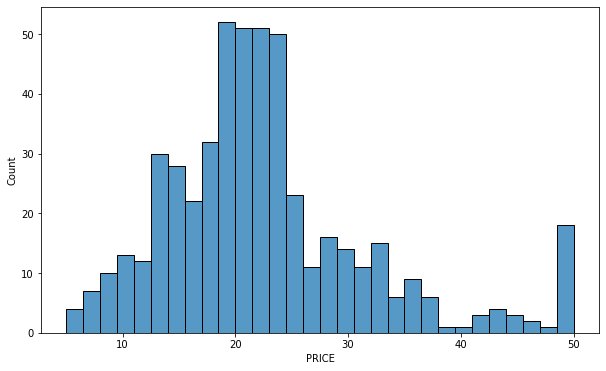

In [10]:
#EDA, first trying to determine the distribution of dependent variable (PRICE)
plt.figure(figsize=(10, 6))
sns.histplot(df['PRICE'],bins=30)

#Observation
#The values of PRICE follows a normal distribution with a mean of around 22. There are some outliers to the right.

<AxesSubplot:>

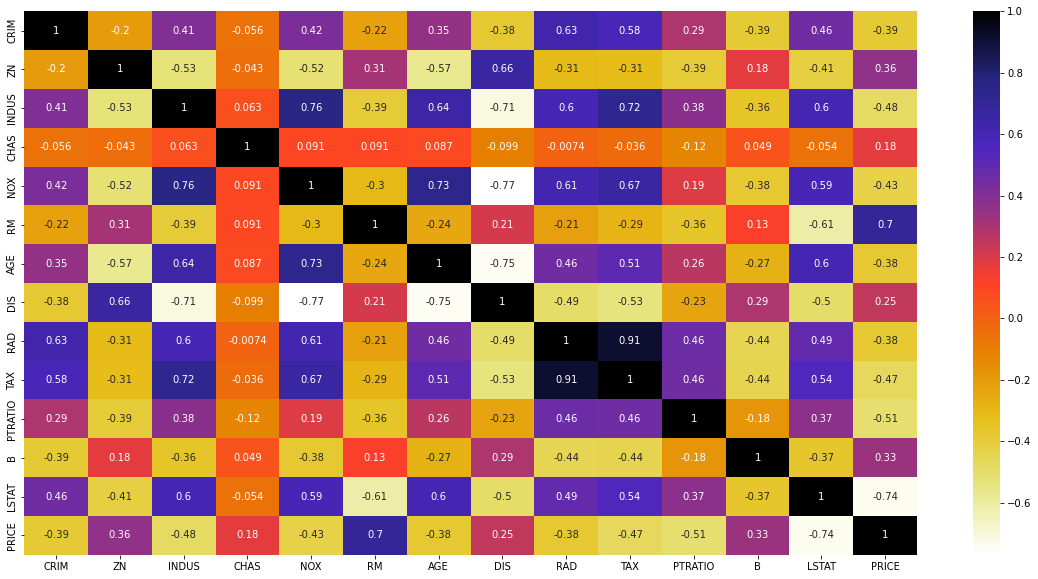

In [11]:
#heat map for co-relation analysis using heatmap
# annot = True to print the values inside the square

plt.figure(figsize = (20, 10))
sns.heatmap(df.corr(), annot = True, cmap = plt.cm.CMRmap_r)

#Observations from below heatmap

#correlation matrix shows that PRICE is strongly correlated to LSTAT(-0.74,negatively correlated), RM(=0.7,positively correlated)
#RAD and TAX are strongly correlated(0.91 values below), i.e if Tax increases, accessibility to radial highways also increases
#AGE and DIS are negatively correlated to each other i.e if a house is older then Weighted distances to five Boston employment centers 
#decreases. Similarly, other such pairs are "DIS - NOX", "DIS - INDUS" and "LSTAT - RM"


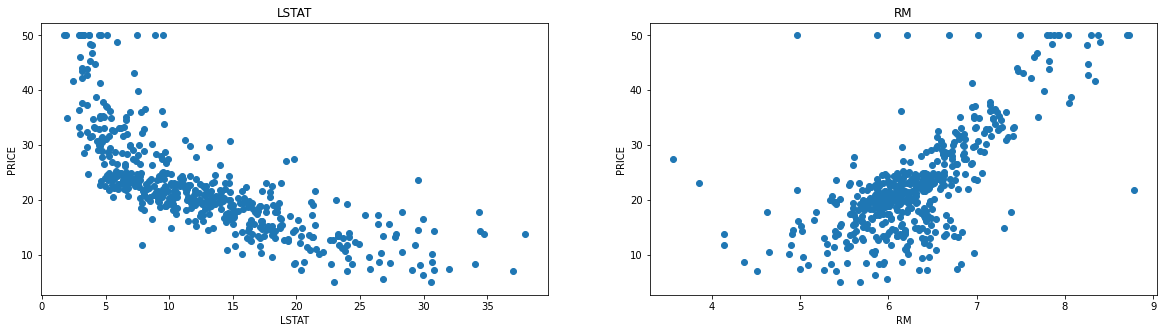

In [12]:
# EDA and visulaization to explore realtion b/w LSTAT, RM and PRICE
plt.figure(figsize=(20, 5))

features = ['LSTAT', 'RM']
target = df['PRICE']

for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = df[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('PRICE')

In [19]:
# Data Splitting
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=51)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(379, 13)
(379,)
(127, 13)
(127,)


In [ ]:
# Various Models tried for pratice 

In [20]:
# Linear Regression model
from sklearn.linear_model import LinearRegression
modelLR = LinearRegression()
modelLR.fit(X_train, y_train)
modelLR.score(X_test, y_test)

# calculating the accuracy on train and test
print("Training Accuracy :",modelLR.score(X_train,y_train)*100)
print("Testing Accuracy :",modelLR.score(X_test,y_test)*100)

Training Accuracy : 72.66936395863108
Testing Accuracy : 75.93611187824763


In [21]:
#R2 Score
from sklearn.metrics import mean_squared_error,r2_score
print("Linear Regression Model Accuracy",r2_score(y,modelLR.predict(X))*100)

Linear Regression Model Accuracy 73.67325302484409


In [22]:
# DecsionTree with max_depth =3
from sklearn.tree import DecisionTreeRegressor
modelDT = DecisionTreeRegressor(max_depth=3)
modelDT.fit(X_train, y_train)
modelDT.score(X_test, y_test)

# calculating the accuracy
print("Training Accuracy :",modelDT.score(X_train,y_train)*100)
print("Testing Accuracy :",modelDT.score(X_test,y_test)*100)

Training Accuracy : 81.63182023092392
Testing Accuracy : 66.35843116810132


In [31]:
#R2 Score
print("Model Accuracy",r2_score(y,modelDT.predict(X))*100)

Model Accuracy 77.20136617208728


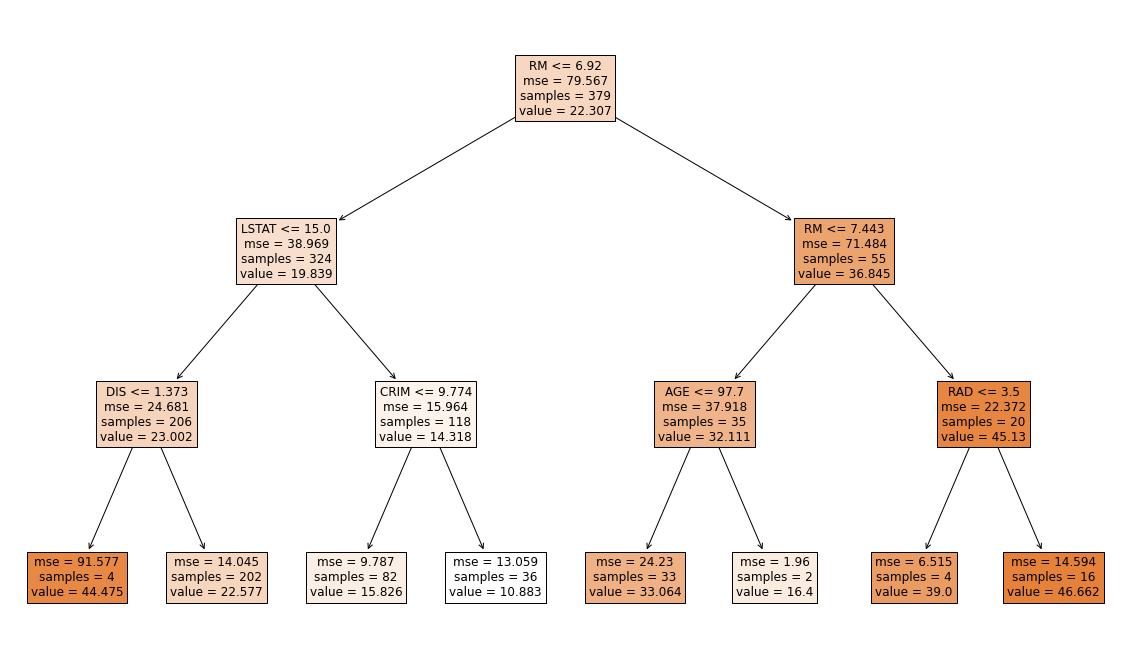

In [84]:
#visualizing decision tree
plt.figure(figsize=(20, 12))
plot_tree(modelDT, fontsize=12, filled=True, feature_names=X.columns);

In [27]:
#GBM Model
from sklearn.ensemble import GradientBoostingRegressor
modelGB = GradientBoostingRegressor()
modelGB.fit(X_train, y_train)
modelGB.score(X_test, y_test)

# calculating the accuracy
print("Training Accuracy :",modelGB.score(X_train,y_train)*100)
print("Testing Accuracy :",modelGB.score(X_test,y_test)*100)

Training Accuracy : 98.15405881219314
Testing Accuracy : 88.83767013052817


In [32]:
print("Model Accuracy",r2_score(y,modelGB.predict(X))*100)

Model Accuracy 95.43474246541741


In [41]:
#Random Forest Model
from sklearn.ensemble import RandomForestRegressor
modelRF = RandomForestRegressor()
modelRF.fit(X_train, y_train)
modelRF.score(X_test, y_test)

# calculating the accuracy
print("Training Accuracy :",modelRF.score(X_train,y_train)*100)
print("Testing Accuracy :",modelRF.score(X_test,y_test)*100)

Training Accuracy : 97.92379885284932
Testing Accuracy : 84.78081325789127


In [42]:
print("Model Accuracy",r2_score(y,modelRF.predict(X))*100)

Model Accuracy 94.08660480629642


In [44]:
#Feature Engineering, determining the important features

def feat_importance(modelRF,df_train):
    importance = modelRF.feature_importances_
    importance = pd.DataFrame(importance,index=df_train.columns,columns=["Importance"])
    return importance.sort_values(by=['Importance'],ascending=False)
importance = feat_importance(modelRF,X_train)
importance[:]

,Importance
RM,0.453631
LSTAT,0.347349
DIS,0.064978
CRIM,0.042100
NOX,0.018234
TAX,0.017932
AGE,0.016468
PTRATIO,0.013023
B,0.012189
INDUS,0.006147


<AxesSubplot:>

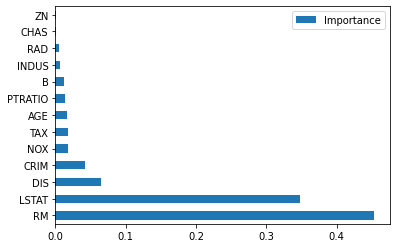

In [47]:
importance.plot(kind='barh')

In [64]:
# Discarding non-important features, next step is try discard features with importance coefficient less than 0.01 
#and use it to model our Random Forest again to see if there is an improvement in the prediction results

to_keep = importance[importance['Importance'] > 0.01].index
df_raw_train_keep = df[to_keep].copy()
df_raw_test_keep = df[to_keep].copy()
to_keep
df_raw_train_keep.info()

#X_train,X_valid = split_vals(df_raw_train_keep,n_train)
X_train, X_test, y_train, y_test = train_test_split(df_raw_train_keep, y, test_size=0.25, random_state=51)
X_train
y_train

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   RM       506 non-null    float64
 1   LSTAT    506 non-null    float64
 2   DIS      506 non-null    float64
 3   CRIM     506 non-null    float64
 4   NOX      506 non-null    float64
 5   TAX      506 non-null    int64  
 6   AGE      506 non-null    float64
 7   PTRATIO  506 non-null    float64
 8   B        506 non-null    float64
dtypes: float64(8), int64(1)
memory usage: 35.7 KB


370    50.0
210    21.7
275    32.0
35     18.9
226    37.6
       ... 
197    30.3
457    13.5
224    44.8
485    21.2
57     31.6
Name: PRICE, Length: 379, dtype: float64

In [66]:
# Fitting our Random Forest Model after discarding the less important features; minor improvement in scores observed
modelRF2 = RandomForestRegressor()
modelRF2.fit(X_train, y_train)
modelRF2.score(X_test, y_test)

# calculating the accuracy
print("Training Accuracy :",modelRF2.score(X_train,y_train)*100)
print("Testing Accuracy :",modelRF2.score(X_test,y_test)*100)

Training Accuracy : 98.2050282241201
Testing Accuracy : 86.12304180469195


In [102]:
#Finding best hyperparameters for tuning
n_estimators = [int(x) for x in np.arange(start = 10, stop = 2000, step = 10)]
max_features = [0.5, 1]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
# First create the base model to tune
m = RandomForestRegressor()
# Fit the random search model
m_random = RandomizedSearchCV(estimator = m, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
m_random.fit(X_train, y_train)
m_random.best_params_

Fitting 3 folds for each of 100 candidates, totalling 300 fits


{'n_estimators': 700,
 'min_samples_leaf': 1,
 'max_features': 0.5,
 'bootstrap': False}

In [ ]:
# Observation: From our Randomized Grid Search, we found that the most optimized hyperparameters for our 
#Random Forest Model to be those above

In [104]:
#Final Model
modelRFF = RandomForestRegressor(n_estimators = 700, min_samples_leaf= 2, max_features= 0.5,bootstrap= False )
modelRFF.fit(X_train, y_train)
modelRFF.score(X_test, y_test)

# calculating the accuracy
print("Training Accuracy :",modelRFF.score(X_train,y_train)*100)
print("Testing Accuracy :",modelRFF.score(X_test,y_test)*100)

Training Accuracy : 99.51499212154971
Testing Accuracy : 89.43875375305575


In [ ]:
# Observation: After removing less important features and conducting hyperparameter tuning our final model has improved quiet a bit


In [138]:
#PDP plot for final model

def plot_pdp(feat,clusters=None,feat_name=None):
    feat_name = feat_name or feat
    p = pdp.pdp_isolate(modelRFF,X_train,feat)
    return pdp.pdp_plot(p,feat_name,plot_lines=True)
    plot_pdp('RM', 'LSTAT')